<a href="https://colab.research.google.com/github/BudiAtu/skripsi-cnn-chili/blob/main/data90epoch150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Install TensorFlow 2.2

In [ ]:
!pip install tensorflow==2.2

     |████████████████████████████████| 516.2 MB 3.9 kB/s 
     |████████████████████████████████| 454 kB 58.8 MB/s 
     |████████████████████████████████| 2.9 MB 17.1 MB/s 
     |████████████████████████████████| 3.0 MB 48.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalli

In [ ]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow Version :", tf.__version__)
print("Keras Version      :", keras.__version__)

TensorFlow Version : 2.2.0
Keras Version      : 2.3.0-tf


In [ ]:
import os
fold_virus_kerupuk = os.path.join('/content/drive/MyDrive/dataset/virus kerupuk')
fold_daun_sehat = os.path.join('/content/drive/MyDrive/dataset/daun sehat')
fold_virus_gemini = os.path.join('/content/drive/MyDrive/dataset/virus gemini')

print("Jumlah Data Train Tiap Kelas")
print('Jumlah gambar Virus Kerupuk :', len(os.listdir(fold_virus_kerupuk)))
print('Jumlah gambar daun sehat  :', len(os.listdir(fold_daun_sehat)))
print('Jumlah gambar virus gemini :', len(os.listdir(fold_virus_gemini)))

print("\nMenampilkan file gambar")
file_virus_kerupuk = os.listdir(fold_virus_kerupuk)
print("virus kerupuk:", file_virus_kerupuk[:3])

file_daun_sehat = os.listdir(fold_daun_sehat)
print("daun sehat:", file_daun_sehat[:3])

file_virus_gemini = os.listdir(fold_virus_gemini)
print("Virus gemini :", file_virus_gemini[:3])

Jumlah Data Train Tiap Kelas
Jumlah gambar Virus Kerupuk : 150
Jumlah gambar daun sehat  : 200
Jumlah gambar virus gemini : 200

Menampilkan file gambar
virus kerupuk: ['K01.JPG', 'K02.JPG', 'K03.JPG']
daun sehat: ['S02.jpg', 'S01.jpg', 'S03.jpg']
Virus gemini : ['G01.JPG', 'G02.JPG', 'G03.JPG']


In [ ]:
os.mkdir('/tmp/dataset/')
os.mkdir('/tmp/dataset/train/')
os.mkdir('/tmp/dataset/test/')
os.mkdir('/tmp/dataset/train/virus kerupuk/')
os.mkdir('/tmp/dataset/test/virus kerupuk/')
os.mkdir('/tmp/dataset/train/daun sehat/')
os.mkdir('/tmp/dataset/test/daun sehat/')
os.mkdir('/tmp/dataset/train/virus gemini/')
os.mkdir('/tmp/dataset/test/virus gemini/')

In [ ]:
import random
from shutil import copyfile

def train_val_split(source, train, test, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  test_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  test_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in test_files:
    i_file = source + i
    destination = test + i
    copyfile(i_file, destination)

train_ratio = 0.9
#Pembagian Training dan Test

source_00 = '/content/drive/MyDrive/dataset/virus kerupuk/'
train_00 = '/tmp/dataset/train/virus kerupuk/'
test_00 = '/tmp/dataset/test/virus kerupuk/'
train_val_split(source_00, train_00, test_00, train_ratio)

source_01 = '/content/drive/MyDrive/dataset/daun sehat/'
train_01 = '/tmp/dataset/train/daun sehat/'
test_01 = '/tmp/dataset/test/daun sehat/'
train_val_split(source_01, train_01, test_01, train_ratio)

source_02 = '/content/drive/MyDrive/dataset/virus gemini/'
train_02 = '/tmp/dataset/train/virus gemini/'
test_02 = '/tmp/dataset/test/virus gemini/'
train_val_split(source_02, train_02, test_02, train_ratio)


2. PRAPROSES DATASET

2-1. UBAH DATA MENJADI ARRAY

In [ ]:
import os
import cv2
import random
import numpy as np

img_size_224p = 128 # ⚠️Can be Customized⚠️ If use 224 pixels, it will be Out of Memory (OOM)

path_train  = '/tmp/dataset/train/'
path_test   = '/tmp/dataset/test/'
categories  = ['daun sehat', 'virus gemini', 'virus kerupuk']

def create_data_img(folder_path):
    imageData = []
    for category in categories:
        path = os.path.join(folder_path, category)
        class_num = categories.index(category) # Take the Label as the Index
        for img in os.listdir(path):
            img_array   = cv2.imread(os.path.join(path, img)) 
            img_convert = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resize  = cv2.resize(img_convert, (img_size_224p, img_size_224p))
            imageData.append([img_resize, class_num])
    
    return imageData

dataTrain   = create_data_img(path_train)
dataTest    = create_data_img(path_test)

2-2. Get Features (X) & Labels (y)

In [ ]:
# X for Features & y for Labels
X_train, y_train, X_test, y_test = [], [], [], []

for features, label in dataTrain:
    X_train.append(features)
    y_train.append(label)

for features, label in dataTest:
    X_test.append(features)
    y_test.append(label)

# -1 in reshape, means to let Numpy define the appropriate data dimensions
X_train = np.array(X_train).reshape(-1, img_size_224p, img_size_224p, 3)
y_train = np.asarray(y_train)
X_test  = np.array(X_test).reshape(-1, img_size_224p, img_size_224p, 3)
y_test  = np.asarray(y_test)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)

X_train : (495, 128, 128, 3)
y_train : (495,)
X_test  : (55, 128, 128, 3)
y_test  : (55,)


2-3. FEATURES (X) : NORMALIZATION

In [ ]:
print("Array of X_train :\n\n", X_train[0]) # Take the first data for example
print("\nArray of X_test  :\n\n", X_test[0])

def prep_pixels(train, test):
    # Convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # Normalize (feature scaling) to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # Return normalized images
    return train_norm, test_norm

X_train_norm, X_test_norm = prep_pixels(X_train, X_test)

print("\nArray of X_train_norm :\n\n", X_train_norm[0])
print("\nArray of X_test_norm  :\n\n", X_test_norm[0])

Array of X_train :

 [[[131 142 126]
  [129 133 119]
  [122 124 107]
  ...
  [103 138 105]
  [104 141 107]
  [106 143 110]]

 [[130 153 125]
  [110 129 101]
  [108 121  92]
  ...
  [107 142 109]
  [110 147 116]
  [112 149 118]]

 [[180 219 174]
  [156 192 146]
  [127 155 109]
  ...
  [113 150 114]
  [115 152 119]
  [116 153 120]]

 ...

 [[138 179 147]
  [134 175 143]
  [133 175 140]
  ...
  [120 158 133]
  [120 159 128]
  [108 148 114]]

 [[141 182 150]
  [129 170 138]
  [128 169 135]
  ...
  [117 156 123]
  [108 148 111]
  [102 142 103]]

 [[141 182 150]
  [138 179 147]
  [130 172 137]
  ...
  [115 154 116]
  [115 156 113]
  [113 155 110]]]

Array of X_test  :

 [[[228 222 187]
  [165 152 113]
  [216 227 160]
  ...
  [215 229 176]
  [219 235 186]
  [208 223 179]]

 [[238 227 199]
  [132 118  86]
  [206 219 158]
  ...
  [210 234 182]
  [216 236 190]
  [211 228 186]]

 [[207 192 160]
  [161 148 116]
  [194 212 149]
  ...
  [195 223 153]
  [198 215 152]
  [203 217 154]]

 ...

 [[148 19

2-4. LABELS (y) : ONE HOT ENCODING

In [ ]:
from tensorflow.keras.utils import to_categorical

print("Array of y_train :", y_train)
print("Array of y_test  :", y_test)

# One Hot Encode target values
y_train_encode = to_categorical(y_train)
y_test_encode  = to_categorical(y_test)

print("\nArray of y_train_encode :\n\n", y_train_encode)
print("\nArray of y_test_encode :\n\n", y_test_encode)

Array of y_train : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2

2-5. PLOT/TAMPILKAN DATASET

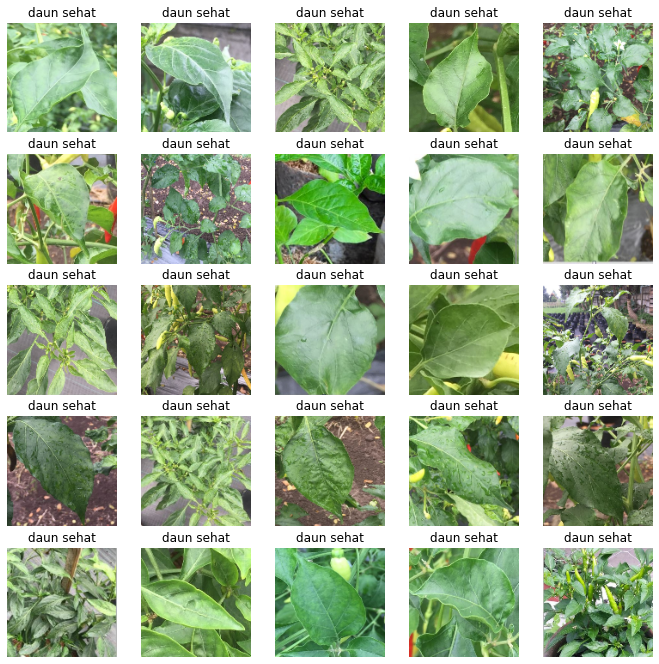

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

nrows = 5 # ⚠️Can be Customized⚠️
ncols = 5 # ⚠️Can be Customized⚠️
hspace = 0
wspace = 0
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))    
fig.subplots_adjust(hspace, wspace)

for i in range(nrows):
    for j in range(ncols):
        temp = i*ncols+j                # Index looping
        ax[i,j].imshow(X_train[temp])   # Show Features/images
        if y_train[temp] == 0:
            judul = "daun sehat"
        elif y_train[temp] == 1:
            judul = "virus gemini"
        elif y_train[temp] == 2:
            judul = "virus kerupuk"

            
        ax[i,j].set_title(judul)        # Show Labels
        ax[i,j].axis('off')             # Hide axis
plt.show()

2-6. BERSIHKAN USELESS DATA (RAM CLEANER)

In [ ]:
import gc     # Gabage Collector for cleaning deleted data from memory

del dataTrain
del dataTest
del X_train
del X_test
#del y_train  # Used later for Confusion Matrix
#del y_test   # Used later for Confusion Matrix

gc.collect()

115

2-7. DATA FINAL YANG AKAN DIGUNAKAN

In [ ]:
print("X_train_norm     :", X_train_norm.shape)
print("y_train_encode   :", y_train_encode.shape)
print("X_test_norm      :", X_test_norm.shape)
print("y_test_encode    :", y_test_encode.shape)

X_train_norm     : (495, 128, 128, 3)
y_train_encode   : (495, 3)
X_test_norm      : (55, 128, 128, 3)
y_test_encode    : (55, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                  rescale = 1./255.,
                  rotation_range = 30,
                  horizontal_flip = True,
                  shear_range = 0.3,
                  fill_mode = 'nearest',
                  width_shift_range = 0.2,
                  height_shift_range = 0.2,
                  zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
                rescale = 1./255.,
                rotation_range = 30,
                horizontal_flip = True,
                shear_range = 0.3,
                fill_mode = 'nearest',
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                zoom_range = 0.1
)

In [ ]:
train_dir = '/tmp/dataset/train/'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (128, 128),
    batch_size = 10,
    class_mode = 'categorical'
)

val_dir = '/tmp/dataset/test/'
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (128, 128),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 495 images belonging to 3 classes.
Found 55 images belonging to 3 classes.


3. BANGUN ARSITEKTUR

3-1. ARSITEKTUR CNN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0

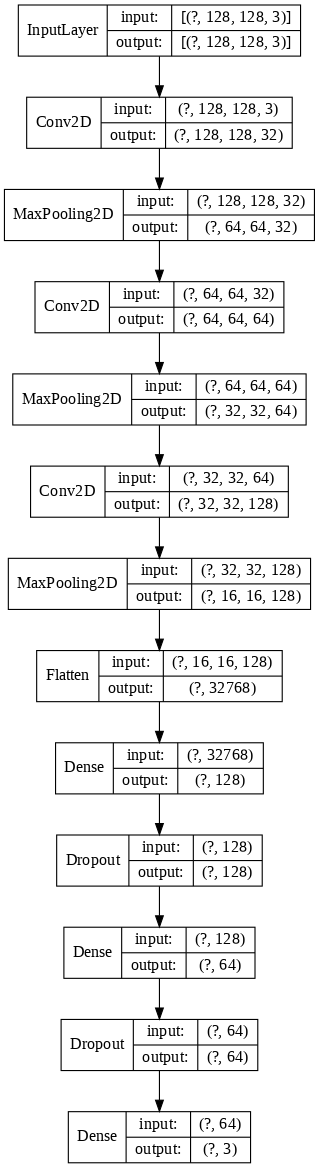

In [ ]:
# Referensi Arsitektur: https://www.tensorflow.org/tutorials/images/classification

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

def define_model_kustom():
    model = Sequential()

      # 01-Feature Extractor Layer
    model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(img_size_224p, img_size_224p, 3))) # ⚠️ Sesuaikan Input Shape
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # 02-Flatten Layer
    model.add(Flatten())
    
    # 03-Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5, seed=10))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5, seed=10))
    model.add(Dense(3, activation='softmax'))
    
    # Compile Model
    opt = Adam(lr=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = define_model_kustom()
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

4. TRAINING DENGAN CNN

4-1. TRAINING UNTUK CNN

In [ ]:
os.mkdir("/content/simpan_model") # Buat folder untuk save model report (run 1x)

Training

In [ ]:
%%time

import pandas as pd

epochs = 150       # ⚠️ SESUAIKAN ⚠️
batch_size = 10   # ⚠️ SESUAIKAN ⚠️

model = define_model_kustom() 

#=======================================================================================================================================#
# CARA 1 : validation_split=0.2 ➜ artinya langsung memecah data train ➜ jadi 80% train & 20% validation ➜ memakan banyak sekali RAM
#          hal ini berarti pula bahwa penggunaan K-Fold itu memberatkan komputasi, coba saja sendiri, terlebih jika data berupa image
#          dan jumlah data hingga ribuan, hal ini akan memakan bayak sekali RAM, bahkan bisa hingga terjadi Out of Memory (OOM). Dan
#          karena alasan ini pula banyak sekali tutorial Image Classification dengan CNN yang tersebar di internet, tidak memakai
#          K-Fold. sebenarnya penggunaan K-Fold itu diperuntukan untuk Machine Learning, bukan Deep Learning, karena alasan komputasi.
#          sebagai alternatif solusinya yaitu gunakan saja pre-trained model terkenal, maka K-Fold tidak terlalu dibutuhkan, bahkan
#          jumlah epoch pun tidak harus banyak. dengan pre-trained model terkenal, meskipun dataset yang digunakan sedikit (misal
#          dibawah 1000), tetap berpotensi besar menghasilkan model yang optimal untuk kasus dataset yang digunakan. dan jika pada
#          saat testing menghasilkan akurasi yang baik, maka hal ini sudah membuktikan bahwa penggunaan K-Fold tidak terlalu dibutuhkan.
#=======================================================================================================================================#
#history = model.fit(X_train_norm, y_train_encode, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=1)

#=======================================================================================================================================#
# CARA 2 : validation_data=(X_test_norm, y_test_encode) ➜ artinya gunakan data validasi dari luar/bukan dari data train yang dipecah
#          ➜ minim penggunaan RAM. CARA 2 ini sebagai alternatif solusi yang baik jika ingin training dengan validasi sekaligus.
#=======================================================================================================================================#
history = model.fit(train_generator, validation_data = val_generator, epochs=epochs, batch_size=batch_size, verbose=1)

#=======================================================================================================================================#
# CARA 3 : TANPA VALIDATION DATA. jika menggunakan CARA 2, malah menghasilkan lebih banyak salah prediksi saat testing data dari internet.
#          hal ini kemungkinan besar akibat terlalu serupanya data train dengan data validasi. Oleh karena itu, dalam kasus ini, karena
#          memang dataset yang sebenarnya hanya sedikit (banyak akibat di augmetasi saja), maka yang dilakukan hanyalah training dan
#          testing saja, tanpa melalui tahapan validasi. namun disamping itu, model yang dihasilkan sudah cukup baik. buktikan saja.
#=======================================================================================================================================#
#history = model.fit(X_train_norm, y_train_encode, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/150
50/50 [==============================] - 42s 834ms/step - loss: 1.1024 - accuracy: 0.3677 - val_loss: 1.0718 - val_accuracy: 0.7273
Epoch 2/150
50/50 [==============================] - 37s 736ms/step - loss: 1.0459 - accuracy: 0.4424 - val_loss: 0.9138 - val_accuracy: 0.6909
Epoch 3/150
50/50 [==============================] - 38s 755ms/step - loss: 0.9209 - accuracy: 0.5455 - val_loss: 0.8678 - val_accuracy: 0.5818
Epoch 4/150
50/50 [==============================] - 37s 737ms/step - loss: 0.8612 - accuracy: 0.5737 - val_loss: 0.7383 - val_accuracy: 0.5636
Epoch 5/150
50/50 [==============================] - 37s 738ms/step - loss: 0.8147 - accuracy: 0.6121 - val_loss: 0.7075 - val_accuracy: 0.8182
Epoch 6/150
50/50 [==============================] - 40s 793ms/step - loss: 0.7837 - accuracy: 0.6646 - val_loss: 0.6317 - val_accuracy: 0.7273
Epoch 7/150
50/50 [==============================] - 37s 732ms/step - loss: 0.7877 - accuracy: 0.6303 - val_loss: 0.6331 - val_accuracy:

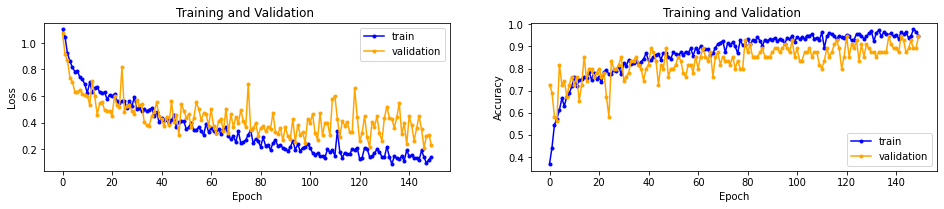

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_single(histories):
        plt.figure(figsize=(16,6))

        # plot loss
        plt.subplot(221) # 2 baris, 2 kolom, index ke-1
        plt.title('Training and Validation ')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories['loss'], color='blue', marker='.', label='train')
        plt.plot(histories['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')

        # plot accuracy
        plt.subplot(222) # 2 baris, 2 kolom, index ke-2
        plt.title('Training and Validation ')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories['accuracy'], color='blue', marker='.', label='train')
        plt.plot(histories['val_accuracy'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='bottom right')
        plt.show()

summarize_diagnostics_single(history.history)

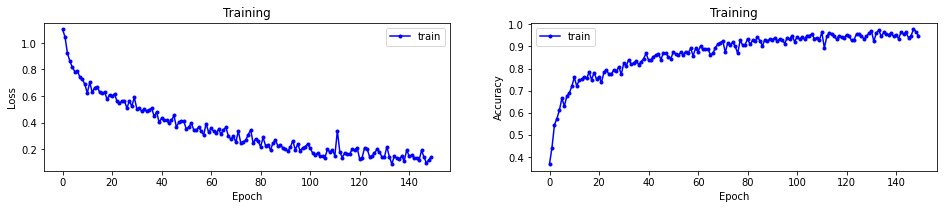

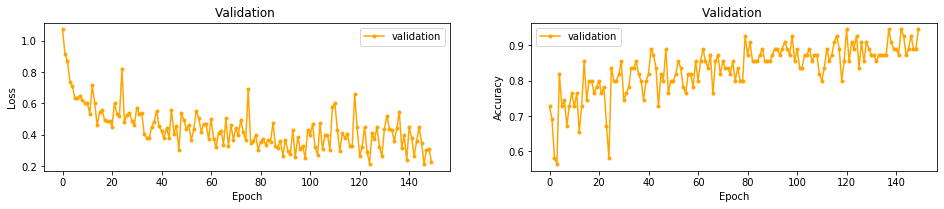

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_single(histories):
        plt.figure(figsize=(16,6))

        # plot loss
        plt.subplot(221) # 2 baris, 2 kolom, index ke-1
        plt.title('Training')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories['loss'], color='blue', marker='.', label='train')
        plt.legend(['train'], loc='upper right')

        # plot accuracy
        plt.subplot(222) # 2 baris, 2 kolom, index ke-2
        plt.title('Training')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories['accuracy'], color='blue', marker='.', label='train')
        plt.legend(['train'], loc='bottom right')
        plt.show()

        plt.figure(figsize=(16,6))
        # plot loss
        plt.subplot(221) # 2 baris, 2 kolom, index ke-1
        plt.title('Validation ')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['validation'], loc='upper right')

        # plot accuracy
        plt.subplot(222) # 2 baris, 2 kolom, index ke-2
        plt.title('Validation ')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories['val_accuracy'], color='orange',  marker='.', label='test')
        plt.legend(['validation'], loc='bottom right')
        plt.show()

summarize_diagnostics_single(history.history)

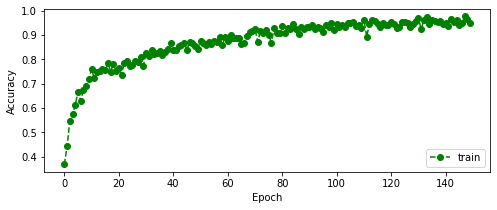

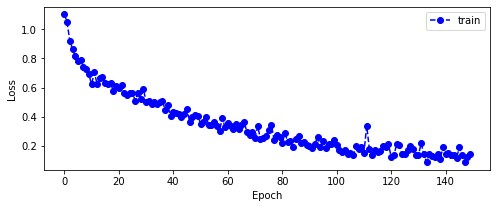

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['accuracy'], 'og', linestyle='dashed')
#ax.plot(history.history['val_accuracy'])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['train', 'val'], loc='lower right')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['loss'], 'ob', linestyle='dashed')
#ax.plot(history.history['val_loss'])
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
# 01 - Save model as h5
model.save("/content/drive/MyDrive/data90epoch150/skripsi.h5")

# 02 - Save model report to csv
model_csv = pd.DataFrame(history.history)
csv_file = "/content/drive/MyDrive/data90epoch150/skripsi.csv"
with open(csv_file, mode="w") as f:
  model_csv.to_csv(f)

In [ ]:
# Load Model (Enter Path of Selected Model)
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/data90epoch150/skripsi.h5') # ⚠️Can be Customized⚠️
#model.summary()

In [ ]:
from sklearn.preprocessing import LabelBinarizer

if "encoder" in globals(): # RAM Cleaner
  del encoder
  del y_train_encode_new
  del y_test_encode_new
  del pred
  del prediksi
  del pred_label
  del true_label
  gc.collect()

encoder             = LabelBinarizer() # Encoding Labels (y) in different ways, for Confusion Matrix purposes
y_train_encode_new  = encoder.fit_transform(y_train)
y_test_encode_new   = encoder.fit_transform(y_test)

pred        = model.predict(X_test_norm.astype('float32'), verbose=0)
prediksi    = np.argmax(pred, axis=-1) # Try -> predict.shape -> (800, 5) -> axis = -1 it will get that value 5 (number of Orchid Labels)

pred_label  = model.predict_classes(X_test_norm, batch_size=64, verbose=0)  # Prediction Result Label
true_label  = np.argmax(y_test_encode_new, axis=-1)                         # Actual Label (in Dataset)

print("Predict Label :", pred_label)
print("Actual Label  :", true_label, "\n")

loss, acc = model.evaluate(X_test_norm, y_test_encode_new, verbose=1)

Predict Label : [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2]
Actual Label  : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

2/2 [==============================] - 1s 306ms/step - loss: 0.3467 - accuracy: 0.9091


In [ ]:
model.save_weights('/content/drive/MyDrive/data90epoch150/model_plant_disease_weight.h5')

In [ ]:
# save ke json

model_json = model.to_json()
with open('/content/drive/MyDrive/data90epoch150/model_plant_disease_1.json', 'w') as json_file:
    json_file.write(model_json)

Accuracy : 90.909%
Loss     : 0.347

Classification Report :

               precision    recall  f1-score   support

   daun sehat       0.86      0.95      0.90        20
 virus gemini       0.95      0.90      0.92        20
virus kerupuk       0.93      0.87      0.90        15

     accuracy                           0.91        55
    macro avg       0.91      0.91      0.91        55
 weighted avg       0.91      0.91      0.91        55



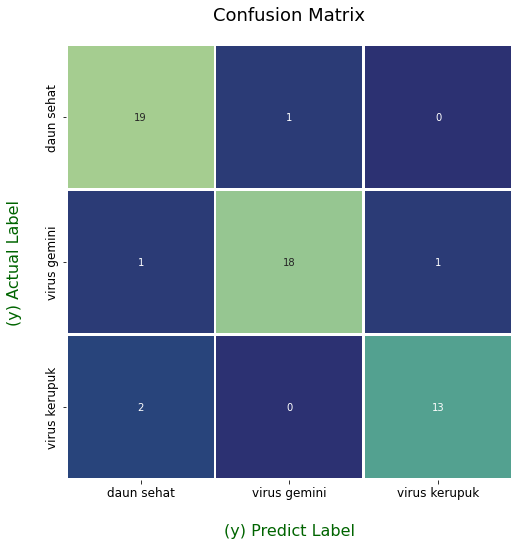

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

target_names = ['daun sehat', 'virus gemini', 'virus kerupuk']
cmatrix = confusion_matrix(true_label, pred_label)
creport = classification_report(true_label, prediksi, target_names=target_names)

print("Accuracy : {:.3f}%".format(acc*100))
print("Loss     : {:.3f}".format(loss))

print("\nClassification Report :\n")
print(creport)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False, ax=ax)
# cmap options: rocket, mako, flare, crest, magma, viridis, rocket_r, cubehelix, seagreen, Blues, ...

ax.set_title('Confusion Matrix', fontsize=18, pad=24)
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Predict Label", fontsize=16, color="darkgreen", labelpad=24)
plt.ylabel("(y) Actual Label", fontsize=16, color="darkgreen", labelpad=24)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# Load and Prepare the Image
def load_image(filename):
    img = load_img(filename, target_size=(img_size_224p, img_size_224p))
    plt.imshow(img)
    plt.axis("off");
    img = img_to_array(img)
    img = img.reshape(-1, img_size_224p, img_size_224p, 3)
    img = img.astype('float32')
    img = img / 255.0
    return img

# Load an Image and Predict the Class/Label
def run_example(new_data_path):
    # Load the Image
    img = load_image(new_data_path)
    # Load Model
    model = load_model('/content/drive/MyDrive/data90epoch150/skripsi.h5') # ⚠️Can be Customized⚠️
    # Predict the Class/Label
    result = model.predict_classes(img) # OPTION 1
    #result = model.predict(img)        # OPTION 2
    if result[0] == 0:
        print("\nPredict Label: daun sehat")
    elif result[0] == 1:
        print("\nPredict Label: gemini virus")
    elif result[0] == 2:
        print("\nPredict Label: virus kerupuk")


Predict Label: gemini virus


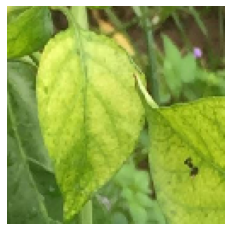

In [ ]:
# Get image data directly from the internet
#!wget -O 'new_test_data.jpg' 'https://th.bing.com/th/id/OIP.WuQn2OSNr13AiNJtR7pzugHaEL?pid=ImgDet&rs=1'

# Get image data from the dataset
new_data_path = '/content/drive/MyDrive/dataset/virus gemini/G24.JPG' # ⚠️Can be Customized⚠️
run_example(new_data_path)

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/data90epoch150/skripsi.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("/content/drive/MyDrive/data90epoch150/skripsi.tflite", "wb").write(tflite_model)

17849816

In [ ]:
# Cara 2 : Upload data baru via local PC
from google.colab import files
uploaded = files.upload()

Saving R.jfif to R.jfif


In [ ]:
# Cara 3 : Upload data baru via download langsung dari internet
!wget -O 'data_test_baru.jpg' 'https://belajartani.com/wp-content/uploads/2021/03/cucumber-mosaic-virus-CMV-pada-cabai.jpg'

--2021-12-17 19:19:20--  https://belajartani.com/wp-content/uploads/2021/03/cucumber-mosaic-virus-CMV-pada-cabai.jpg
Resolving belajartani.com (belajartani.com)... 103.7.226.172
Connecting to belajartani.com (belajartani.com)|103.7.226.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48794 (48K) [image/jpeg]
Saving to: ‘data_test_baru.jpg’

data_test_baru.jpg  100%[===================>]  47.65K   102KB/s    in 0.5s    

2021-12-17 19:19:22 (102 KB/s) - ‘data_test_baru.jpg’ saved [48794/48794]

